In [1]:
# from pathlib import Path
import os
from citlab_python_util.parser.xml.page.page import Page
from PIL import Image, ImageDraw
import numpy as np
from pathlib import Path
import cv2

In [2]:
path = '/Users/davoodwadi/ICPR 2020 Text Segmentation/simple_pages_train'
pathxmls = os.path.join(path,'xmls')
pathimages = os.path.join(path,'images')
save_folder = os.path.join(path,'save')

In [3]:
save_folder

'/Users/davoodwadi/ICPR 2020 Text Segmentation/simple_pages_train/save'

In [4]:
p = Path(pathimages)
# for image in p.iterdir():
# #     print(image.suffix)
#     name = image.stem
#     suffix = image.suffix
#     os.rename(pathimages+f'/{name}{suffix}', pathimages+f'/{name}.png')

In [7]:
pathxmls

'/Users/davoodwadi/ICPR 2020 Text Segmentation/simple_pages_train/xmls'

In [5]:
p

PosixPath('/Users/davoodwadi/ICPR 2020 Text Segmentation/simple_pages_train/images')

In [91]:
for imggg in p.iterdir():
    # get a page
    res = 600
    imageName = imggg.stem
    path_to_page = os.path.join(pathxmls,f'{imageName}.xml')
    path_to_image = os.path.join(pathimages,f'{imageName}.png')
    page_filename = os.path.basename(path_to_page)
    save_path = os.path.join(save_folder,page_filename)

    # Generate page object
    page_obj = Page(path_to_xml=path_to_page)

    # all lines of the image
    list_of_image_lines = page_obj.get_textlines()

    # all regions of the image (without graphic regions)
    # These are the main blocks that need to be identified and assigned to the test set
    list_of_image_regions = page_obj.get_text_regions()

    factor = 2
    
    img = Image.open(path_to_image)
    img = img.convert(mode='RGBA')#.resize((res, (int(res*img.size[1]//img.size[0]))))
    alpha = Image.new('L', img.size)
    draw = ImageDraw.Draw(alpha)

    for i in range(len(list_of_image_regions)):
        tmp = list_of_image_regions[i]
        draw.polygon(tmp.points.points_list, fill=i+1)

    imgArr = np.array(img)
    imArr = np.array(img)
    imArr [:,:,3] = alpha
    
    imgArr = cv2.resize(imgArr, (res, (int(res*img.size[1]//img.size[0]))), interpolation=cv2.INTER_NEAREST)
    imArr = cv2.resize(imArr, (res, (int(res*img.size[1]//img.size[0]))), interpolation=cv2.INTER_NEAREST)
    
    imgArr1 = imgArr[:int(imgArr.shape[0]/factor), :, :]
    imgArr2 = imgArr[int(imgArr.shape[0]/factor):, :, :]
    imArr1 = imArr[:int(imgArr.shape[0]/factor), :, :]
    imArr2 = imArr[int(imgArr.shape[0]/factor):, :, :]

    img1 = Image.fromarray(imgArr1)
    img2 = Image.fromarray(imgArr2)
    im1 = Image.fromarray(imArr1)
    im2 = Image.fromarray(imArr2)
    
#     im.getchannel(3).save(path+f'/masks/{imageName}.png')
    img1.save(path+f'/images2_600/{imageName}_1.png')
    img2.save(path+f'/images2_600/{imageName}_2.png')
    im1.getchannel(3).save(path+f'/masks2_600/{imageName}_1.png')
    im2.getchannel(3).save(path+f'/masks2_600/{imageName}_2.png')

PageXml is not valid according to the Page schema definition http://schema.primaresearch.org/PAGE/gts/pagecontent/2013-07-15 http://schema.primaresearch.org/PAGE/gts/pagecontent/2013-07-15/pagecontent.xsd.
File given by /Users/davoodwadi/ICPR 2020 Text Segmentation/simple_pages_train/xmls/ONB_nfp_19110701_013.xml is not a valid PageXml file.
PageXml is not valid according to the Page schema definition http://schema.primaresearch.org/PAGE/gts/pagecontent/2013-07-15 http://schema.primaresearch.org/PAGE/gts/pagecontent/2013-07-15/pagecontent.xsd.
File given by /Users/davoodwadi/ICPR 2020 Text Segmentation/simple_pages_train/xmls/ONB_aze_18950706_2.xml is not a valid PageXml file.
PageXml is not valid according to the Page schema definition http://schema.primaresearch.org/PAGE/gts/pagecontent/2013-07-15 http://schema.primaresearch.org/PAGE/gts/pagecontent/2013-07-15/pagecontent.xsd.
File given by /Users/davoodwadi/ICPR 2020 Text Segmentation/simple_pages_train/xmls/ONB_krz_19110701_012.xml

## instance masks for different factors
in corresponding factor directory/ corresponding factor naming

In [11]:
for imggg in p.iterdir():
    # get a page
#     res = 800
    imageName = imggg.stem
    path_to_page = os.path.join(pathxmls,f'{imageName}.xml')
    path_to_image = os.path.join(pathimages,f'{imageName}.png')
    page_filename = os.path.basename(path_to_page)
    save_path = os.path.join(save_folder,page_filename)

    # Generate page object
    page_obj = Page(path_to_xml=path_to_page)

    # all lines of the image
    list_of_image_lines = page_obj.get_textlines()

    # all regions of the image (without graphic regions)
    # These are the main blocks that need to be identified and assigned to the test set
    list_of_image_regions = page_obj.get_text_regions()

    factor = 2
    
    img = Image.open(path_to_image)
    img = img.convert(mode='RGBA')#.resize((res, (int(res*img.size[1]//img.size[0]))))
    alpha = Image.new('L', img.size)
    draw = ImageDraw.Draw(alpha)

    for i in range(len(list_of_image_regions)):
        tmp = list_of_image_regions[i]
        draw.polygon(tmp.points.points_list, fill=i+1)

    imgArr = np.array(img)
    imArr = np.array(img)
    imArr [:,:,3] = alpha
    
#     imgArr = cv2.resize(imgArr, (res, (int(res*img.size[1]//img.size[0]))), interpolation=cv2.INTER_NEAREST)
#     imArr = cv2.resize(imArr, (res, (int(res*img.size[1]//img.size[0]))), interpolation=cv2.INTER_NEAREST)
    
    imgArrList=[]
    imArrList=[]
    amount = int(imgArr.shape[0]/factor)
    for i in range(factor):
        if i==factor-1:
            tmpArr = imgArr[i*amount:, :, :]
            Image.fromarray(tmpArr).save(path+f'/images{factor}/{imageName}_{factor}_{i+1}.png')
            tmArr = imArr[i*amount:, :, :]
            Image.fromarray(tmArr).getchannel(3).save(path+f'/masks{factor}/{imageName}_{factor}_{i+1}.png')

        tmpArr = imgArr[i*amount:(i+1)*amount, :, :]
        Image.fromarray(tmpArr).save(path+f'/images{factor}/{imageName}_{factor}_{i+1}.png')
        tmArr = imArr[i*amount:(i+1)*amount, :, :]
        Image.fromarray(tmArr).getchannel(3).save(path+f'/masks{factor}/{imageName}_{factor}_{i+1}.png')
        
        
        
#     imgArr1 = imgArr[:int(imgArr.shape[0]/factor), :, :]
#     imgArr2 = imgArr[int(imgArr.shape[0]/factor):, :, :]
#     imArr1 = imArr[:int(imgArr.shape[0]/factor), :, :]
#     imArr2 = imArr[int(imgArr.shape[0]/factor):, :, :]

#     img1 = Image.fromarray(imgArr1)
#     img2 = Image.fromarray(imgArr2)
#     im1 = Image.fromarray(imArr1)
#     im2 = Image.fromarray(imArr2)
    
# #     im.getchannel(3).save(path+f'/masks/{imageName}.png')
#     img1.save(path+f'/images2_600/{imageName}_1.png')
#     img2.save(path+f'/images2_600/{imageName}_2.png')
#     im1.getchannel(3).save(path+f'/masks2_600/{imageName}_1.png')
#     im2.getchannel(3).save(path+f'/masks2_600/{imageName}_2.png')

PageXml is not valid according to the Page schema definition http://schema.primaresearch.org/PAGE/gts/pagecontent/2013-07-15 http://schema.primaresearch.org/PAGE/gts/pagecontent/2013-07-15/pagecontent.xsd.
File given by /Users/davoodwadi/ICPR 2020 Text Segmentation/simple_pages_train/xmls/ONB_nfp_19110701_013.xml is not a valid PageXml file.
PageXml is not valid according to the Page schema definition http://schema.primaresearch.org/PAGE/gts/pagecontent/2013-07-15 http://schema.primaresearch.org/PAGE/gts/pagecontent/2013-07-15/pagecontent.xsd.
File given by /Users/davoodwadi/ICPR 2020 Text Segmentation/simple_pages_train/xmls/ONB_aze_18950706_2.xml is not a valid PageXml file.
PageXml is not valid according to the Page schema definition http://schema.primaresearch.org/PAGE/gts/pagecontent/2013-07-15 http://schema.primaresearch.org/PAGE/gts/pagecontent/2013-07-15/pagecontent.xsd.
File given by /Users/davoodwadi/ICPR 2020 Text Segmentation/simple_pages_train/xmls/ONB_krz_19110701_012.xml

In [8]:
# Alternate  resize - split2
for imggg in p.iterdir():
    # get a page
    res = 800
    imageName = imggg.stem
    path_to_page = os.path.join(pathxmls,f'{imageName}.xml')
    path_to_image = os.path.join(pathimages,f'{imageName}.png')
    page_filename = os.path.basename(path_to_page)
    save_path = os.path.join(save_folder,page_filename)

    # Generate page object
    page_obj = Page(path_to_xml=path_to_page)

    # all lines of the image
    list_of_image_lines = page_obj.get_textlines()

    # all regions of the image (without graphic regions)
    # These are the main blocks that need to be identified and assigned to the test set
    list_of_image_regions = page_obj.get_text_regions()

    factor = 2
    
    img = Image.open(path_to_image)
    img = img.convert(mode='RGBA')#.resize((res, (int(res*img.size[1]//img.size[0]))))
    alpha = Image.new('L', img.size)
    draw = ImageDraw.Draw(alpha)

    for i in range(len(list_of_image_regions)):
        tmp = list_of_image_regions[i]
        ff = 1 if i%2==0 else 2
        draw.polygon(tmp.points.points_list, fill=ff)

    imgArr = np.array(img)
    imArr = np.array(img)
    imArr [:,:,3] = alpha
    
    imgArr = cv2.resize(imgArr, (res, (int(res*img.size[1]//img.size[0]))), interpolation=cv2.INTER_NEAREST)
    imArr = cv2.resize(imArr, (res, (int(res*img.size[1]//img.size[0]))), interpolation=cv2.INTER_NEAREST)
    
    imgArr1 = imgArr[:int(imgArr.shape[0]/factor), :, :]
    imgArr2 = imgArr[int(imgArr.shape[0]/factor):, :, :]
    imArr1 = imArr[:int(imgArr.shape[0]/factor), :, :]
    imArr2 = imArr[int(imgArr.shape[0]/factor):, :, :]

    img1 = Image.fromarray(imgArr1)
    img2 = Image.fromarray(imgArr2)
    im1 = Image.fromarray(imArr1)
    im2 = Image.fromarray(imArr2)
    
#     im.getchannel(3).save(path+f'/masks/{imageName}.png')
    img1.save(path+f'/imagesAlternate/{imageName}_1.png')
    img2.save(path+f'/imagesAlternate/{imageName}_2.png')
    im1.getchannel(3).save(path+f'/masksAlternate/{imageName}_1.png')
    im2.getchannel(3).save(path+f'/masksAlternate/{imageName}_2.png')

PageXml is not valid according to the Page schema definition http://schema.primaresearch.org/PAGE/gts/pagecontent/2013-07-15 http://schema.primaresearch.org/PAGE/gts/pagecontent/2013-07-15/pagecontent.xsd.
File given by /Users/davoodwadi/ICPR 2020 Text Segmentation/simple_pages_train/xmls/ONB_nfp_19110701_013.xml is not a valid PageXml file.
PageXml is not valid according to the Page schema definition http://schema.primaresearch.org/PAGE/gts/pagecontent/2013-07-15 http://schema.primaresearch.org/PAGE/gts/pagecontent/2013-07-15/pagecontent.xsd.
File given by /Users/davoodwadi/ICPR 2020 Text Segmentation/simple_pages_train/xmls/ONB_aze_18950706_2.xml is not a valid PageXml file.
PageXml is not valid according to the Page schema definition http://schema.primaresearch.org/PAGE/gts/pagecontent/2013-07-15 http://schema.primaresearch.org/PAGE/gts/pagecontent/2013-07-15/pagecontent.xsd.
File given by /Users/davoodwadi/ICPR 2020 Text Segmentation/simple_pages_train/xmls/ONB_krz_19110701_012.xml

In [9]:
# Alternate  resize - whole
for imggg in p.iterdir():
    # get a page
    res = 800
    imageName = imggg.stem
    path_to_page = os.path.join(pathxmls,f'{imageName}.xml')
    path_to_image = os.path.join(pathimages,f'{imageName}.png')
    page_filename = os.path.basename(path_to_page)
    save_path = os.path.join(save_folder,page_filename)

    # Generate page object
    page_obj = Page(path_to_xml=path_to_page)

    # all lines of the image
    list_of_image_lines = page_obj.get_textlines()

    # all regions of the image (without graphic regions)
    # These are the main blocks that need to be identified and assigned to the test set
    list_of_image_regions = page_obj.get_text_regions()

    factor = 2
    
    img = Image.open(path_to_image)
    img = img.convert(mode='RGBA')#.resize((res, (int(res*img.size[1]//img.size[0]))))
    alpha = Image.new('L', img.size)
    draw = ImageDraw.Draw(alpha)

    for i in range(len(list_of_image_regions)):
        tmp = list_of_image_regions[i]
        ff = 1 if i%2==0 else 2
        draw.polygon(tmp.points.points_list, fill=ff)

    imgArr = np.array(img)
    imArr = np.array(img)
    imArr [:,:,3] = alpha
    
    imgArr = cv2.resize(imgArr, (res, (int(res*img.size[1]//img.size[0]))), interpolation=cv2.INTER_NEAREST)
    imArr = cv2.resize(imArr, (res, (int(res*img.size[1]//img.size[0]))), interpolation=cv2.INTER_NEAREST)
    
#     imgArr1 = imgArr[:int(imgArr.shape[0]/factor), :, :]
#     imgArr2 = imgArr[int(imgArr.shape[0]/factor):, :, :]
#     imArr1 = imArr[:int(imgArr.shape[0]/factor), :, :]
#     imArr2 = imArr[int(imgArr.shape[0]/factor):, :, :]

    img = Image.fromarray(imgArr)
#     img2 = Image.fromarray(imgArr2)
    im = Image.fromarray(imArr)
#     im2 = Image.fromarray(imArr2)
    
#     im.getchannel(3).save(path+f'/masks/{imageName}.png')
    img.save(path+f'/imagesAlternate/{imageName}.png')
#     img2.save(path+f'/imagesAlternate/{imageName}_2.png')
    im.getchannel(3).save(path+f'/masksAlternate/{imageName}.png')
#     im2.getchannel(3).save(path+f'/masksAlternate/{imageName}_2.png')

PageXml is not valid according to the Page schema definition http://schema.primaresearch.org/PAGE/gts/pagecontent/2013-07-15 http://schema.primaresearch.org/PAGE/gts/pagecontent/2013-07-15/pagecontent.xsd.
File given by /Users/davoodwadi/ICPR 2020 Text Segmentation/simple_pages_train/xmls/ONB_nfp_19110701_013.xml is not a valid PageXml file.
PageXml is not valid according to the Page schema definition http://schema.primaresearch.org/PAGE/gts/pagecontent/2013-07-15 http://schema.primaresearch.org/PAGE/gts/pagecontent/2013-07-15/pagecontent.xsd.
File given by /Users/davoodwadi/ICPR 2020 Text Segmentation/simple_pages_train/xmls/ONB_aze_18950706_2.xml is not a valid PageXml file.
PageXml is not valid according to the Page schema definition http://schema.primaresearch.org/PAGE/gts/pagecontent/2013-07-15 http://schema.primaresearch.org/PAGE/gts/pagecontent/2013-07-15/pagecontent.xsd.
File given by /Users/davoodwadi/ICPR 2020 Text Segmentation/simple_pages_train/xmls/ONB_krz_19110701_012.xml

In [84]:
im1.getchannel(3)
resized_image = cv2.resize(np.array(im1), (800, 800), interpolation=cv2.INTER_LINEAR)
resized_image.shape

(800, 800, 4)

In [15]:
altM=path+'/masksAlternate/'

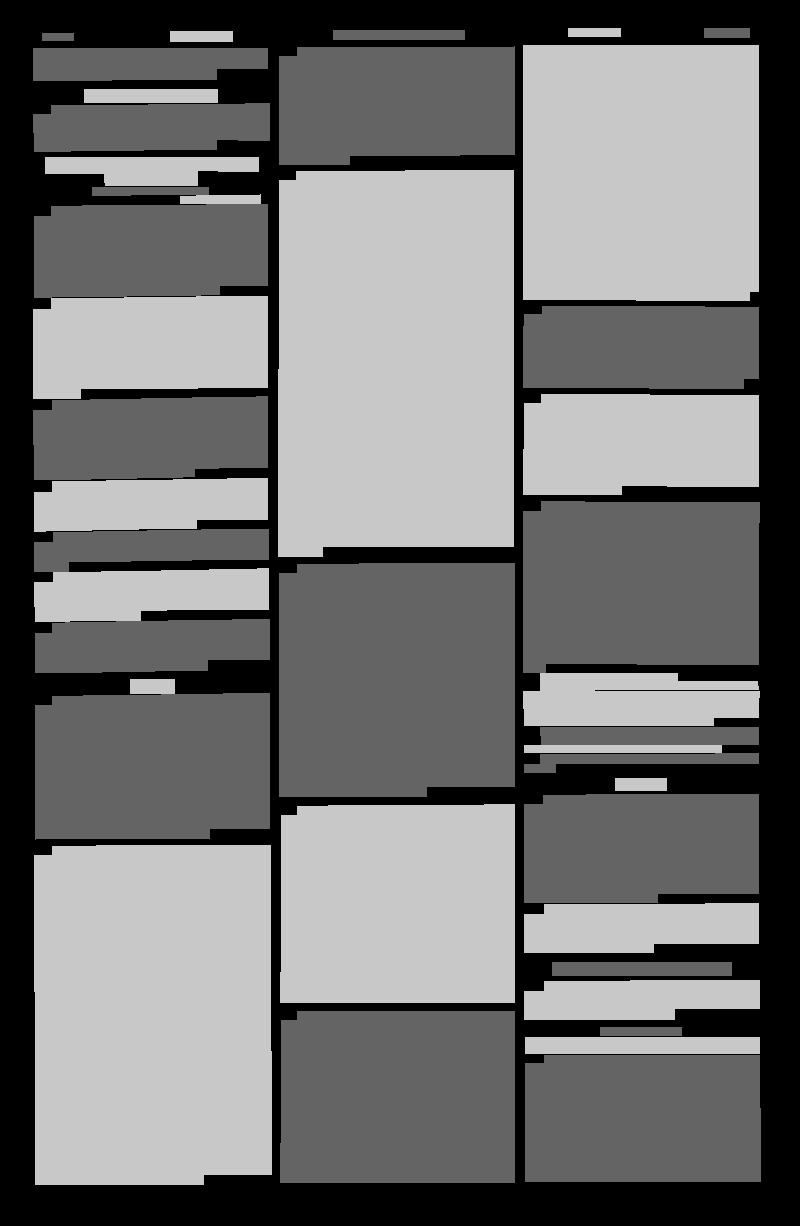

In [23]:
ii=Image.open(altM+os.listdir(altM)[2])

iiArr = np.array(ii)*100

Image.fromarray(iiArr)

In [24]:
altM+os.listdir(altM)[2]

'/Users/davoodwadi/ICPR 2020 Text Segmentation/simple_pages_train/masksAlternate/ONB_nfp_19110701_006.png'

In [109]:
listy = list(p.iterdir())

img = Image.open(listy[15])
np.array(img).shape

(3525, 2691, 4)

In [89]:
im1.save(path+'/pil.png')

In [7]:
# tmp = list_of_image_lines[0]
# tmp.set_article_id()
# tmp.get_article_id()

In [8]:
# all regions of the image (without graphic regions)
# These are the main blocks that need to be identified and assigned to the test set
list_of_image_regions = page_obj.get_text_regions()

# for the test set
# list_of_image_regions[0].id = 'new'
# page_obj.set_text_regions(# give the list_of_image_regions)

In [28]:
tmp = list_of_image_regions[1]
# tmp.points.points_list
# [(91, 44), (1446, 65), (1442, 727), (1304, 722), (1304, 771), (85, 756)]

# tmp.points.to_string()
# '91,44 1446,65 1442,727 1304,722 1304,771 85,756'

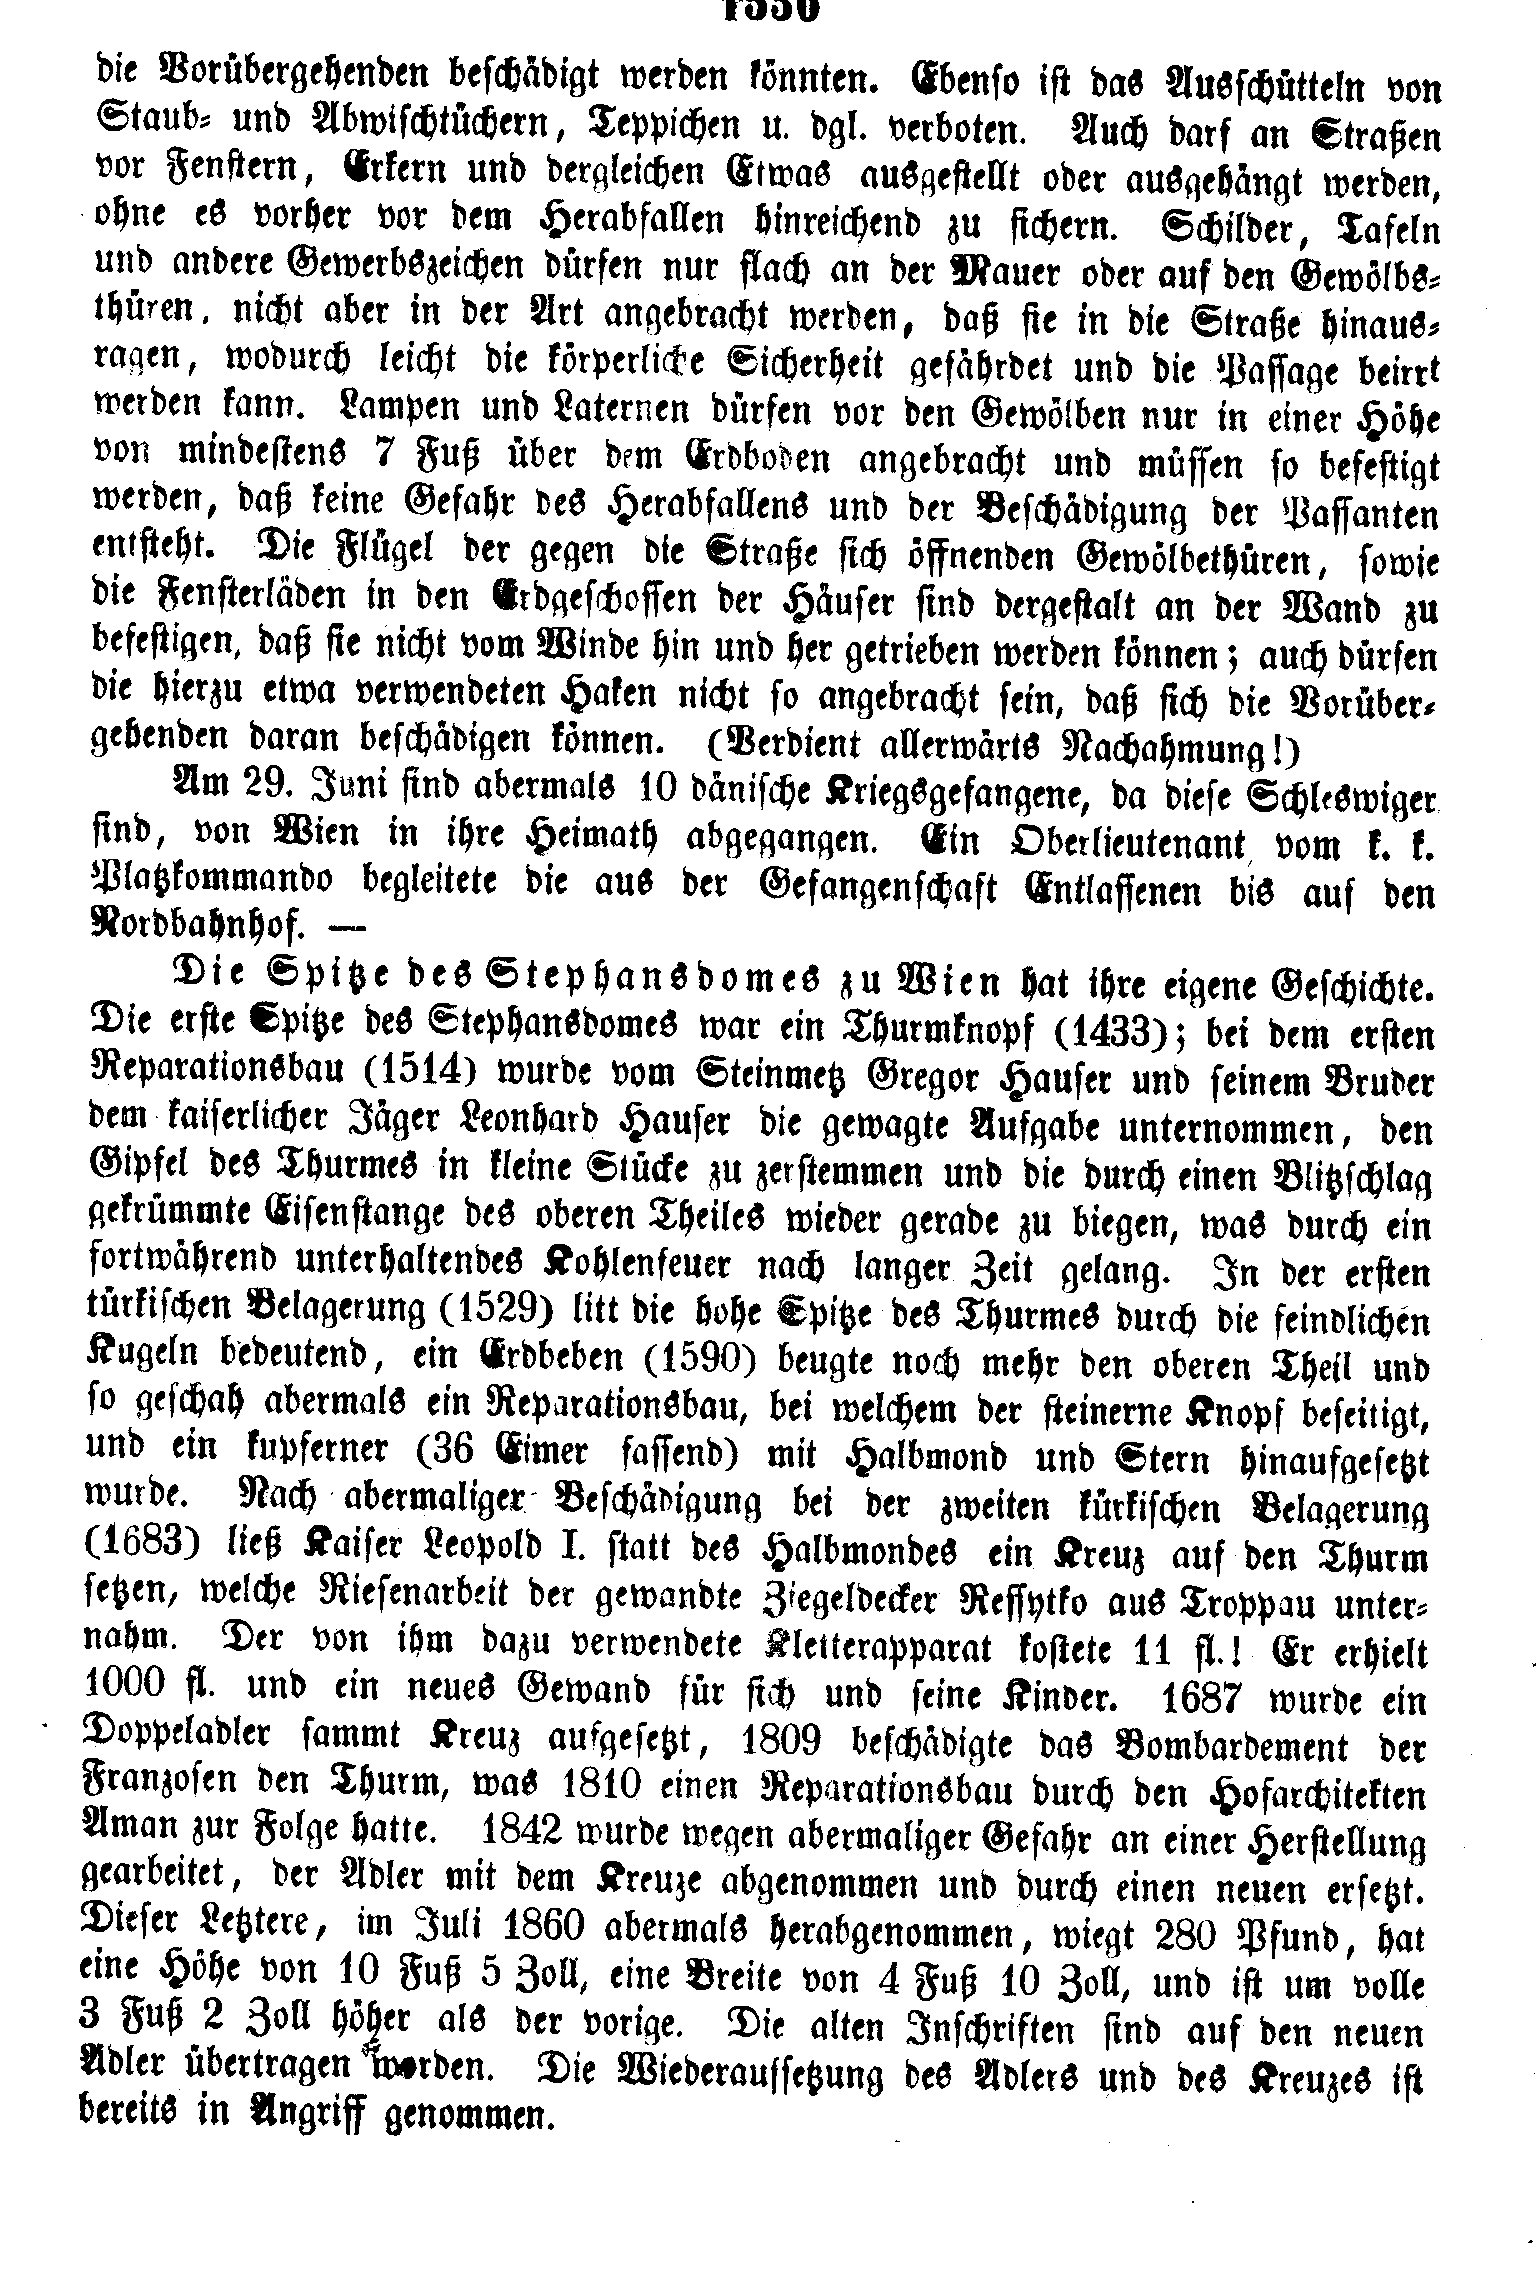

In [21]:
img = Image.open(path_to_image)
img = img.convert(mode='RGBA')
img

In [22]:
img.mode

'RGBA'

In [23]:
alpha = img.getchannel('A')

In [25]:
np.array(alpha)

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [26]:
draw = ImageDraw.Draw(alpha)

In [29]:
draw.polygon(tmp.points.points_list, fill='blue')

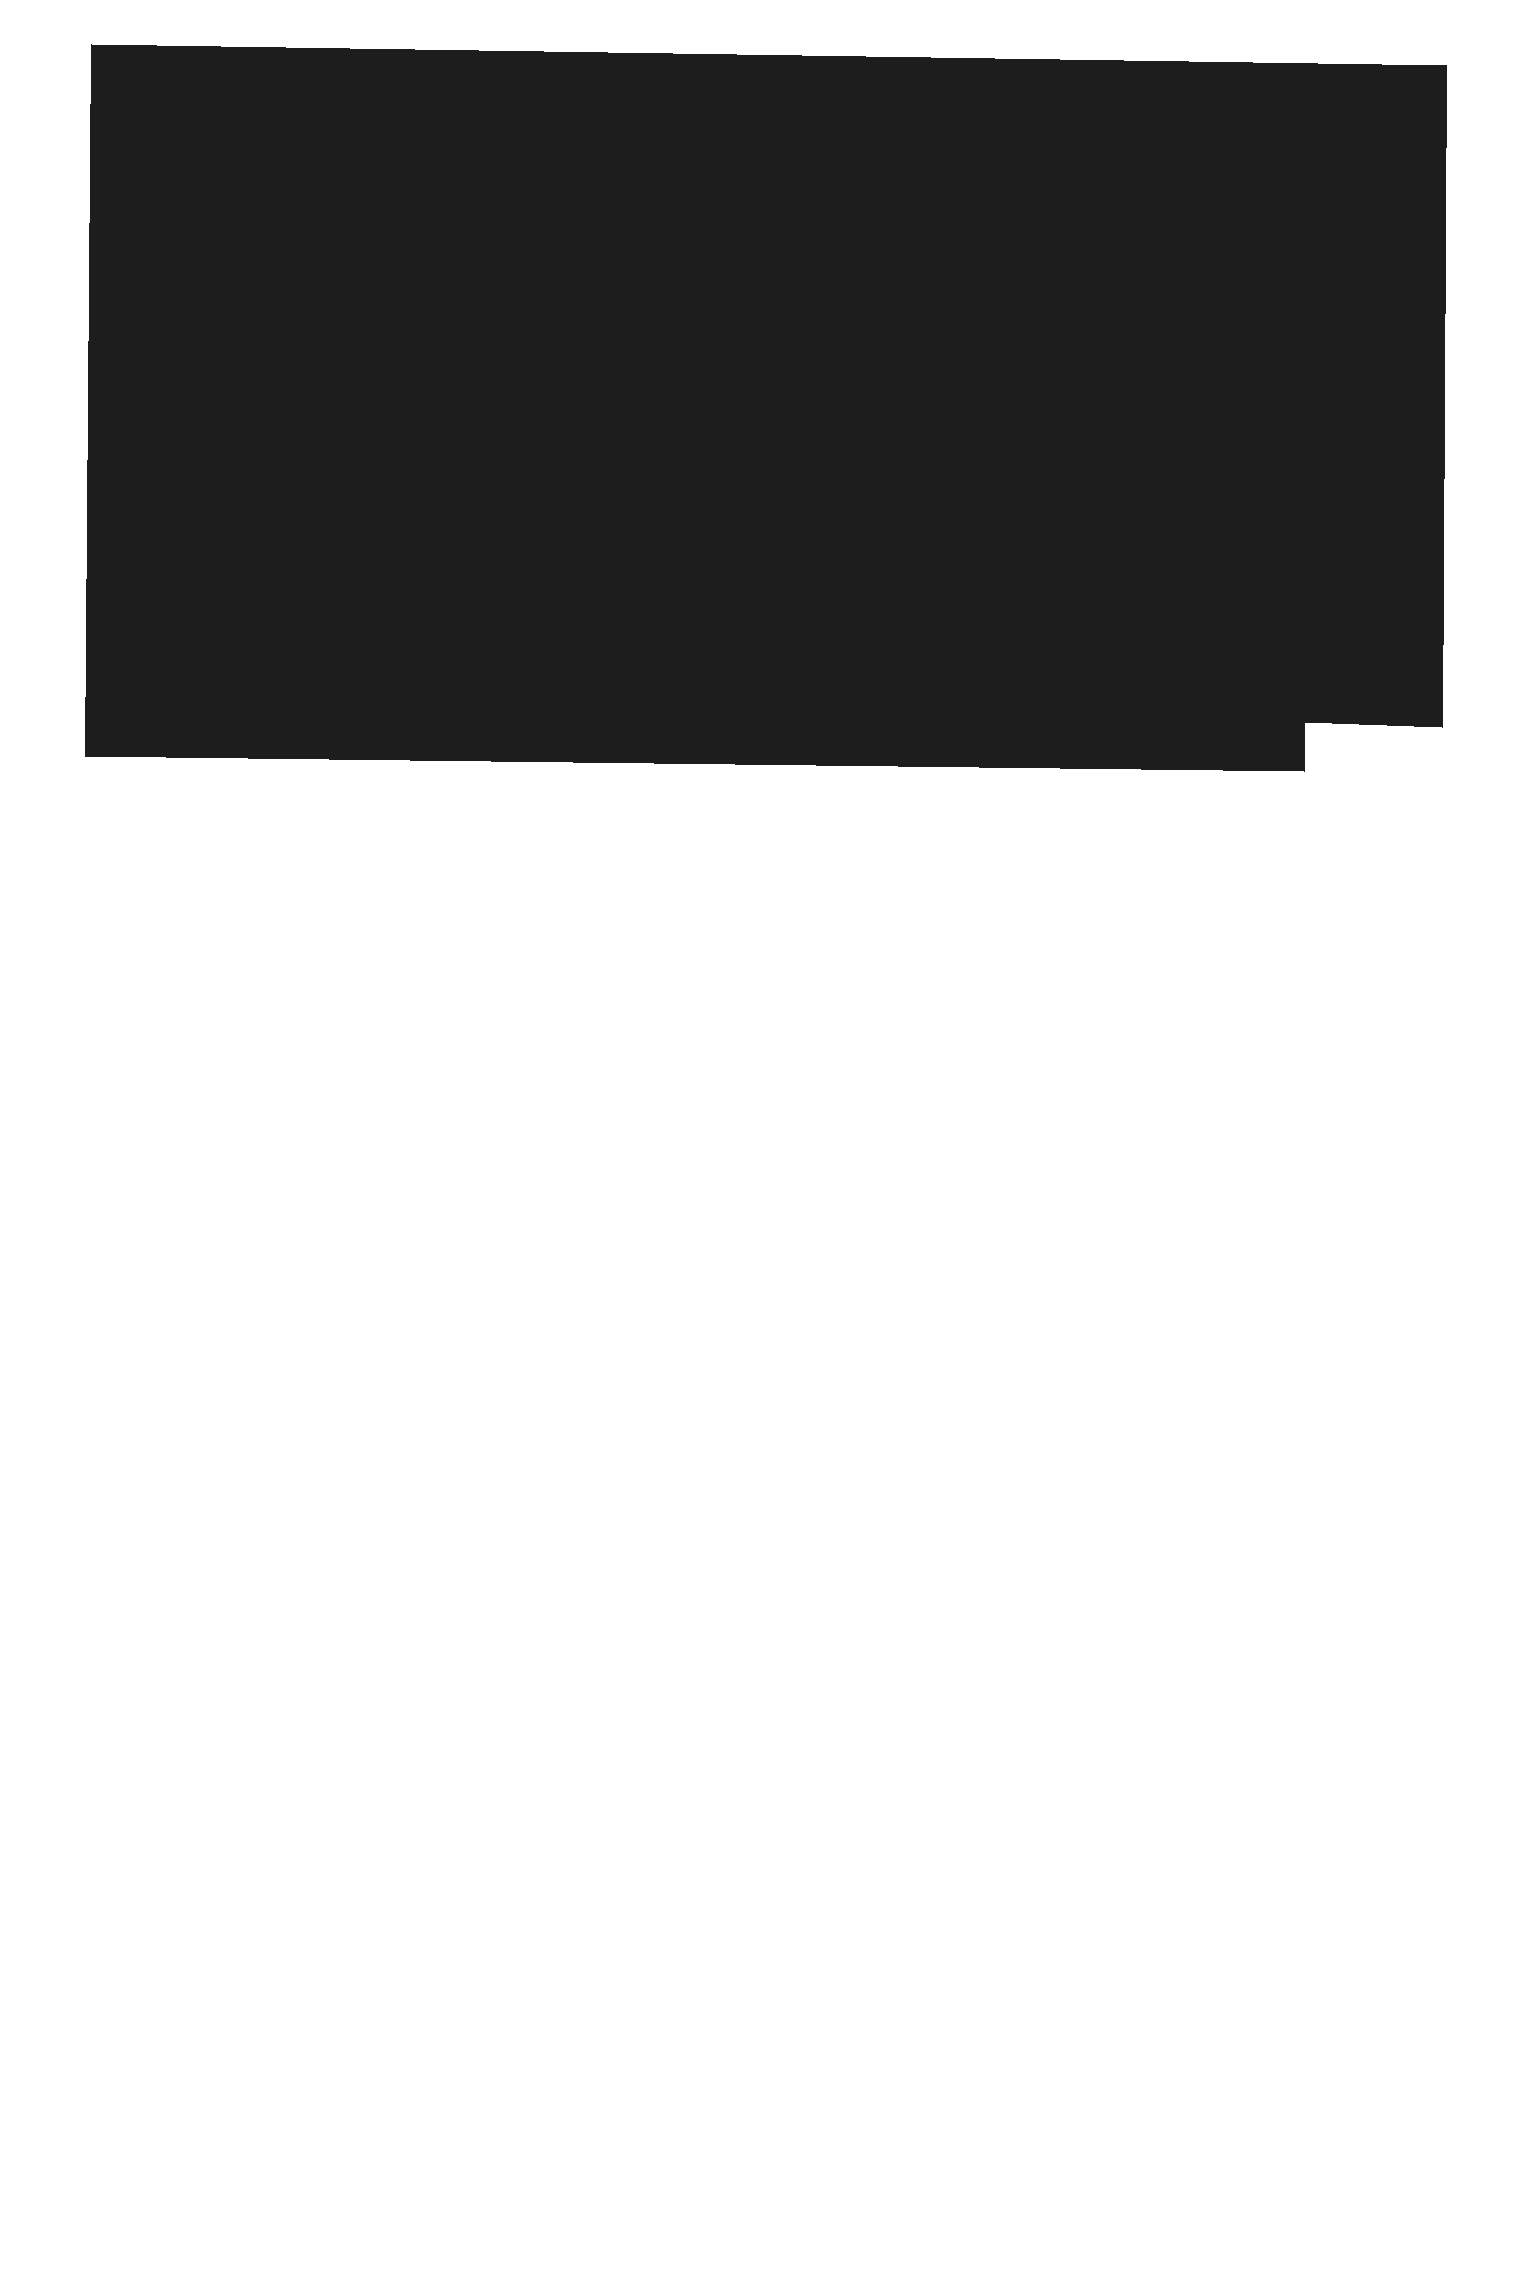

In [55]:
alpha

In [47]:
np.unique(np.array(alpha))

array([ 29, 255], dtype=uint8)

In [56]:
imgArr = np.array(img)

imgArr [:,:,3] = np.where(np.array(alpha)==29, 255, 0)

np.unique(imgArr[:,:,3])

im = Image.fromarray(imgArr)
im

im.getchannel(3).save(path+'/save/1.png')

In [64]:
path

'/Users/davoodwadi/ICPR 2020 Text Segmentation/simple_pages_train'